In [2]:

using WAV
using DSP
using Images
using FileIO
using FFTW
using Images


using Plots
gr(size = (800, 300), legend = true,  background_color = RGB(0.2, 0.2, 0.2),)

file = "/home/konrad/Downloads/APT-testfiles/176400_clear.wav"

"/home/konrad/Downloads/APT-testfiles/176400_clear.wav"

In [3]:
data, sampleRate = wavread(file)
print(sampleRate)

176400.0

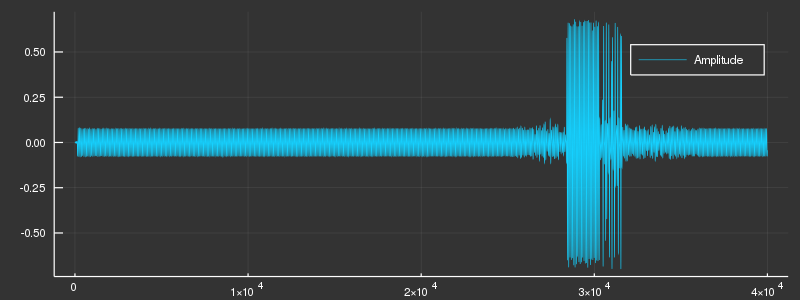

In [4]:
shift = 100

plot(data[1:1:40000],label="Amplitude", lw=0.5 )

In [5]:
print(data[120:1:130])
print("\n Minimum: " * string(minimum(data)) * "\n Maximum: " * string(maximum(data)) )

[0.005859553819391461, 0.006012146366771447, 0.005920590838343455, 0.005584887234107486, 0.005035554063539537, 0.004181035798211615, 0.0030518509475997192, 0.001586962492751854, -6.103701895199438e-5, -0.002227851191747795, -0.0043641468550675985]
 Minimum: -0.7745902890102847
 Maximum: 0.7654652546769616

In [6]:
# Am Demodulation using the Hilbert Transform
amDemod = DSP.Util.hilbert(data[1:1:end])

162324480-element Vector{ComplexF64}:
 -0.0009155552842800705 - 0.07756735713949192im
 -0.0009155552842800131 - 0.058998480707792185im
  -0.000793481246376263 - 0.05305559980401581im
 -0.0006103701895199896 - 0.04555682419583886im
 -0.0002746665852842208 - 0.04190645246023192im
  -6.103701895170291e-5 - 0.037043035198922755im
 0.00015259254737990847 - 0.03455243730600175im
  0.0004577776421398631 - 0.031106642375630333im
  0.0006408886989959127 - 0.02919265152796513im
  0.0009155552842800992 - 0.02666173334368301im
                        ⋮
   -0.15161595507675413 - 0.06416654623813728im
   -0.13629566331980378 - 0.0757461375807654im
   -0.11990722373119286 - 0.08585100532905596im
   -0.10309152500991844 - 0.09218520913124428im
   -0.08587908566545625 - 0.09745503576039266im
    -0.0688802758873259 - 0.098319597919791im
   -0.05218665120395532 - 0.09900265092887404im
   -0.03631702627643668 - 0.09402435262405669im
  -0.021332438123721837 - 0.09235564606991167im

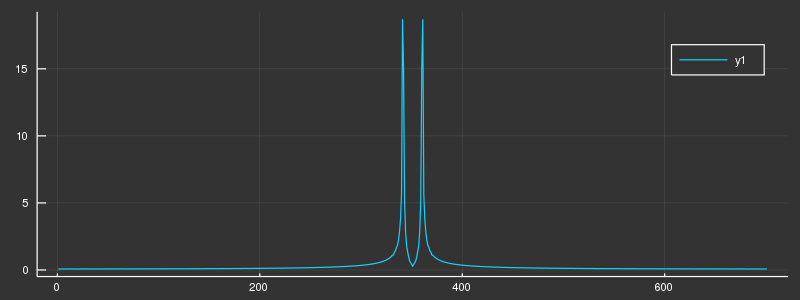

In [7]:
plot(abs.(fftshift(fft(data[300:1:10^3]))))

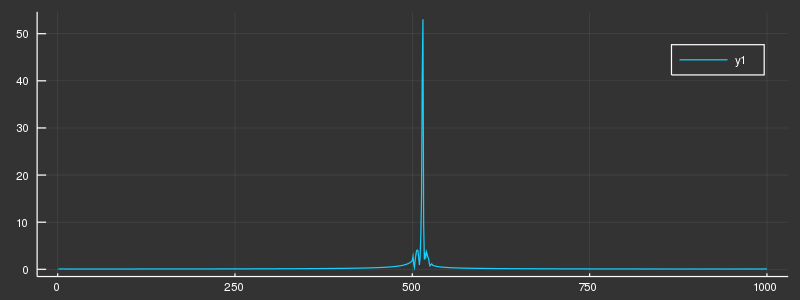

In [8]:
plot(abs.(fftshift(fft(amDemod[1:1:1000]))))

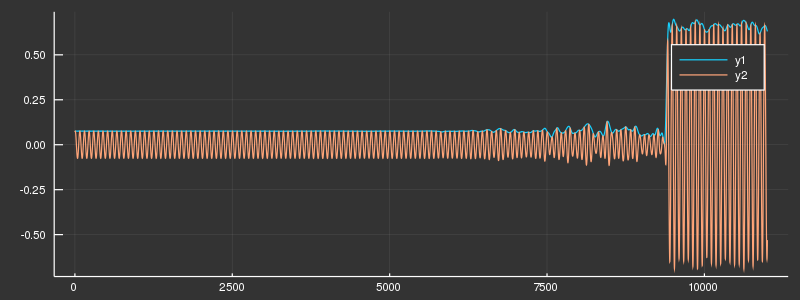

In [9]:
plot(abs.(amDemod[19000:1:30000]))
plot!(data[19000:1:30000])

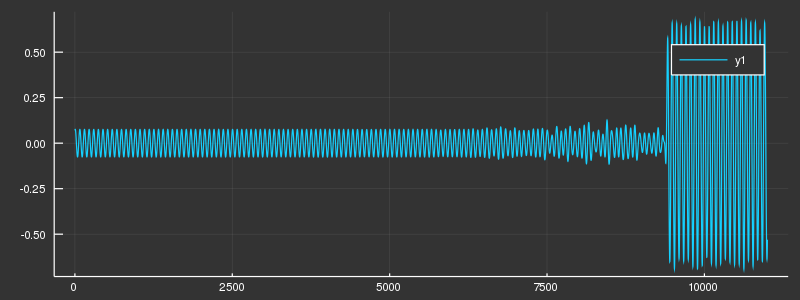

In [10]:
plot(data[19000:1:30000])

In [11]:
# a second contains two frames so frame_len * 2

frame_len = 4160
output_data = DSP.Filters.resample(amDemod, float(frame_len * 2) / float(sampleRate))

#FileIO.save("assets/test.png", colorview(Gray, true))


7656121-element Vector{ComplexF64}:
 -0.0002614099876699581 - 0.021608707639832928im
  0.0035594004829246403 - 0.015945296320424605im
 -0.0015196027729357008 + 0.004243380471551935im
 -0.0014675139971354282 - 0.006005470922062361im
   0.003268527249187619 + 0.00812979300327636im
  -0.002195184388905606 + 0.002487053005641171im
 -0.0016221423233470516 + 0.0309597716901554im
    -0.0696384224269023 + 0.0013428015398907645im
  0.0018225631077626397 - 0.08468832667981473im
    0.07531613070861605 + 0.018201569173862734im
                        ⋮
     0.1671607727245356 + 0.17702698594825433im
   -0.21915171259855004 + 0.11810595286062159im
   -0.05438907581302575 - 0.24455709012983204im
    0.24994219443159324 + 0.005054771608630069im
     -0.055254131214425 + 0.24749973665701924im
   -0.23986521357441684 - 0.11892642842275539im
     0.1961094199285825 - 0.20334433736588547im
    0.12391487137057602 + 0.22926537775865669im
    -0.1714431267140373 + 0.03724446775833335im

In [12]:
using GMT
using IJulia
# using WebIO
# WebIO.install_jupyter_labextension()

img = Array(reshape(range(0,stop=1,length=10^4), 100, 100))

backend(:plotly)
lines = 320
start = 400

# @manipulate for var1=lines, var2=start

    length_sum = ((4160 * 2) * lines)
formated = abs.(output_data[start:1:length_sum + start - 1]) 
print(length(formated))

formated = abs.(reshape(formated, 4160 * 2, lines))

# print(typeof(abs.(img_c)))
# print(typeof(formated))

gui(heatmap(formated, c=:grayscale, transpose = true))

# end


2662400

┌ Info: For saving to png with the Plotly backend ORCA has to be installed.
└ @ Plots /home/konrad/.julia/packages/Plots/cc8wh/src/backends.jl:363
┌ Warning: Keyword argument match_dimensions not supported with Plots.PlotlyBackend().  Choose from: Set([:zforeground_color_guide, :top_margin, :group, :inset_subplots, :background_color, :ytickfontsize, :yforeground_color_text, :yguidefontcolor, :tickfontfamily, :show_empty_bins, :seriesalpha, :legendfontcolor, :seriescolor, :xrotation, :ztick_direction, :tickfont, :xgrid, :ygridalpha, :zlims, :xtick_direction, :colorbar, :zflip, :ticks, :linealpha, :normalize, :linestyle, :xflip, :yforeground_color_guide, :zgrid, :fillcolor, :ygrid, :bar_width, :background_color_inside, :bins, :markerstrokestyle, :zguide, :zforeground_color_text, :yscale, :weights, :xgridalpha, :clims, :xtickfontcolor, :fill_z, :ztickfontfamily, :markershape, :background_color_subplot, :xguide, :fillalpha, :markerstrokewidth, :tick_direction, :xguidefontfamily, :gridlinew

false